<a href="https://colab.research.google.com/github/ondraperny/BI-BPR-2019/blob/master/MURA_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mura dataset
Currently for testing purposes, just part of dataset is used. Specifically XR_HUMERUS data.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import keras.backend as k
from google.colab import drive
drive.mount('/content/drive')
from keras.preprocessing.image import ImageDataGenerator
import os
from glob import glob
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Constants declaration

In [0]:
PATH="/content/drive/My Drive/SKOLA/Bachelor_work/XR_HUMERUS/"
PATH_TRAIN = PATH + 'train'
PATH_VALID = PATH + 'valid'
IMG_SIZE=(224,224)
BATCH_SIZE = 8
INPUT_SHAPE = (*IMG_SIZE, 3)
NUMBER_CLASSES = 2

## Data augmentation
Currently image augmentation will be done by parameters of ImageDataGenerator.
If in future this solution will be insufficient, I will change it.

In [0]:
def ImageDataGenerator_def():
  datagen = ImageDataGenerator(
    # featurewise_center=False,  # set input mean to 0 over the dataset
    # samplewise_center=False,  # set each sample mean to 0
    # featurewise_std_normalization=False,  # divide inputs by std of the dataset
    # samplewise_std_normalization=False,  # divide each input by its std
    # zca_whitening=False,  # apply ZCA whitening
    # zca_epsilon=1e-06,  # epsilon for ZCA whitening
    # rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # # randomly shift images horizontally (fraction of total width)
    # width_shift_range=0.1,
    # # randomly shift images vertically (fraction of total height)
    # height_shift_range=0.1,
    # shear_range=0.,  # set range for random shear
    # zoom_range=0.,  # set range for random zoom
    # channel_shift_range=0.,  # set range for random channel shifts
    # # set mode for filling points outside the input boundaries
    # fill_mode='nearest',
    # cval=0.,  # value used for fill_mode = "constant"
    # horizontal_flip=True,  # randomly flip images
    # vertical_flip=False,  # randomly flip images
    # # set rescaling factor (applied before any other transformation)
    # rescale=None,
    # # set function that will be applied on each input
    # preprocessing_function=None,
    # # image data format, either "channels_first" or "channels_last"
    # data_format=None,
    # # fraction of images reserved for validation (strictly between 0 and 1)
    # validation_split=0.0
  )
  return datagen

def load_from_directory(dir_path):
  '''Call '''
  batches = data_generator.flow_from_directory(
    dir_path,      # this is the target directory
    target_size=IMG_SIZE,  # all images will be resized to 224*224
    batch_size=BATCH_SIZE,
  )
  return batches

In [67]:
data_generator = ImageDataGenerator_def()

train_batches = load_from_directory(PATH_TRAIN)
valid_batches = load_from_directory(PATH_VALID)

print("Found indices: ")
print(train_batches.class_indices)
# print(train_batches.class_indices)

Found 1272 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found indices: 
{'train_negative': 0, 'train_positive': 1}


## Functions
Next block contains definitions of function for following code.

In [0]:
def label_to_string(label):
  '''Map label value to descriptive string'''
  if(label[0] == 0):
    return "Negative"
  else:
    return "Positive"

def show_sample_images():
  '''Show one batch of training images'''
  images, labels = train_batches.next()
  plt.figure(figsize=(25,25))
  for i in range(BATCH_SIZE):
    plt.subplot(1,BATCH_SIZE,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(label_to_string(labels[i]))
    plt.imshow(images[i].astype('uint8'), cmap=plt.cm.binary)
  plt.show()

def prep_images():
  ...

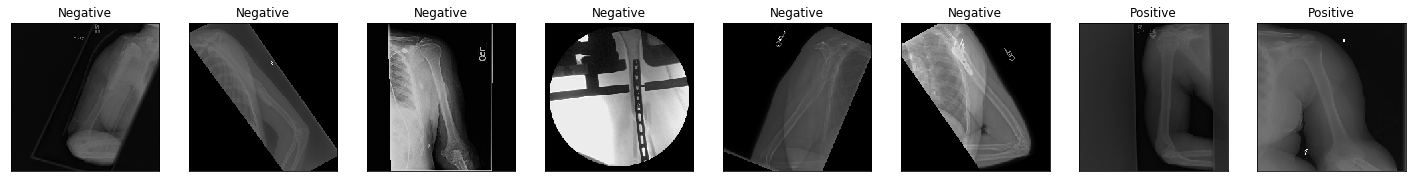

In [57]:
show_sample_images()

## Model definitions

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D



def simple_deep_CNN():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=INPUT_SHAPE))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(NUMBER_CLASSES))
  model.add(Activation('softmax'))
  return model

def model_def():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
  model.add(Flatten())
  model.add(Dense(2, activation='softmax'))
  return model

In [0]:
model = simple_deep_CNN()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [44]:
model.fit_generator(train_batches,
                    steps_per_epoch=62,
                    validation_data = valid_batches,
                    validation_steps = 62,
                    epochs = 5)

Epoch 1/5
62/62 [==============================] - 260s 4s/step - loss: 8.0964 - acc: 0.4940 - val_loss: 7.9616 - val_acc: 0.5060
Epoch 2/5
62/62 [==============================] - 259s 4s/step - loss: 7.5391 - acc: 0.5323 - val_loss: 7.7341 - val_acc: 0.5202
Epoch 3/5
62/62 [==============================] - 258s 4s/step - loss: 7.7016 - acc: 0.5222 - val_loss: 7.7341 - val_acc: 0.5202
Epoch 4/5
62/62 [==============================] - 244s 4s/step - loss: 7.4416 - acc: 0.5383 - val_loss: 7.9616 - val_acc: 0.5060
Epoch 5/5
62/62 [==============================] - 242s 4s/step - loss: 7.6691 - acc: 0.5242 - val_loss: 7.5066 - val_acc: 0.5343
